In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import AutoLocator, AutoMinorLocator, FixedLocator, FixedFormatter, LogLocator, StrMethodFormatter
from matplotlib import patches
from astropy.visualization import ZScaleInterval, ImageNormalize, LogStretch, AsymmetricPercentileInterval, SqrtStretch
from astropy.io import fits
import sunpy
import sunpy.map
aia_193_cm = plt.get_cmap("sdoaia193")
import juanfit
import cmcrameri.cm as cmcm
import scipy.io


In [5]:
def plot_colorbar(im,ax,bbox_to_anchor=(1.02, 0., 1, 1),width="3%",height="100%",
                        loc="lower left",fontsize=14,orientation="vertical"):
    clb_ax = inset_axes(ax,width=width,height=height,loc=loc,
                bbox_to_anchor=bbox_to_anchor,
                 bbox_transform=ax.transAxes,
                 borderpad=0)
    clb = plt.colorbar(im,pad = 0.05,orientation=orientation,ax=ax,cax=clb_ax)
    clb_ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    clb_ax.yaxis.get_offset_text().set_fontsize(fontsize)
    # clb_ax.spines["bottom"].set_color(colors)
    # clb_ax.spines["top"].set_color(colors)
    clb_ax.tick_params(labelsize=fontsize,width=2,which="both")
    
    return clb, clb_ax

def create_limb_circle(rsun):
    return patches.Circle((0,0),rsun,linewidth=2,edgecolor="grey",
                            facecolor="none",alpha=0.6,ls="--")

In [10]:
eis_idl_sav = scipy.io.readsav("../../sav/EIS/EQSPY/EQSPY_lvl1_offset_170821_tilt_cor.sav",verbose=False)
eis_eqs_xcen, eis_eqs_ycen = np.array((eis_idl_sav["xcen"], eis_idl_sav["ycen_195"])) + eis_idl_sav["xy_correct_aia"]
eis_eqs_fovx, eis_eqs_fovy = np.array((eis_idl_sav["fovx"], eis_idl_sav["fovy"]))
eis_eqs_xstart = eis_eqs_xcen - eis_eqs_fovx/2.
eis_eqs_xend = eis_eqs_xcen + eis_eqs_fovx/2.
eis_eqs_ystart = eis_eqs_ycen - eis_eqs_fovy/2.
eis_eqs_yend = eis_eqs_ycen + eis_eqs_fovy/2.

def create_rec_eqs():
    return patches.Rectangle((eis_eqs_xstart, eis_eqs_ystart),
                            eis_eqs_fovx, eis_eqs_fovy,linewidth=2,edgecolor="red",
                            facecolor="none",alpha=0.6)


In [15]:
def plot_line_ratio(filename_1074, filename_1079,xlim,ylim):
    with fits.open(filename_1074) as hdul:
        header_1074 = hdul[0].header
        intensity_1074 = np.copy(hdul[1].data)
        enhanced_intensity_1074 = np.copy(hdul[2].data)
        vlos_1074 = np.copy(hdul[3].data)
        dlamb_1074 = np.copy(hdul[4].data)
    with fits.open(filename_1079) as hdul:
        header_1079 = hdul[0].header
        intensity_1079 = np.copy(hdul[1].data)
        enhanced_intensity_1079 = np.copy(hdul[2].data)
        vlos_1079 = np.copy(hdul[3].data)
        dlamb_1079 = np.copy(hdul[4].data)

    fig, ax = plt.subplots(figsize=(6,6),constrained_layout=True)

    nx, ny = 620, 620
    xcoord = np.linspace(1 - header_1074["CRPIX1"], nx - header_1074["CRPIX1"], nx)*header_1074["CDELT1"]
    ycoord = np.linspace(1 - header_1074["CRPIX2"], nx - header_1074["CRPIX2"], ny)*header_1074["CDELT2"]

    img_yarcsec_mesh, img_xarcsec_mesh = np.meshgrid(ycoord,xcoord,indexing="ij")
    where_in_eis_fov = np.where((img_xarcsec_mesh < eis_eqs_xend) & (img_xarcsec_mesh > eis_eqs_xstart) & \
                (img_yarcsec_mesh < eis_eqs_yend) &  (img_yarcsec_mesh > eis_eqs_ystart))
    print(np.nanmean((intensity_1079/intensity_1074)[where_in_eis_fov]))

    im = ax.pcolormesh(xcoord, ycoord, intensity_1079/intensity_1074,cmap=cmcm.batlowK,vmin=0.2,vmax=0.6,
                    shading="auto",rasterized=True)

    plot_colorbar(im,ax)
    

    ax.set_aspect(1)
    ax.tick_params(labelsize=16)
    ax.add_patch(create_limb_circle(header_1074["RSUN"]))
    ax.add_patch(create_rec_eqs())
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.tick_params(labelleft=False)
    ax.tick_params(labelleft=False)
    ax.set_ylabel(r"\textbf{Solar-Y [arcsec]}",fontsize=18)
    ax.set_ylabel(r"\textbf{Solar-Y [arcsec]}",fontsize=18)
    ax.set_xlabel(r"\textbf{Solar-X [arcsec]}",fontsize=18)
    ax.set_xlabel(r"\textbf{Solar-X [arcsec]}",fontsize=18)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


0.25306684


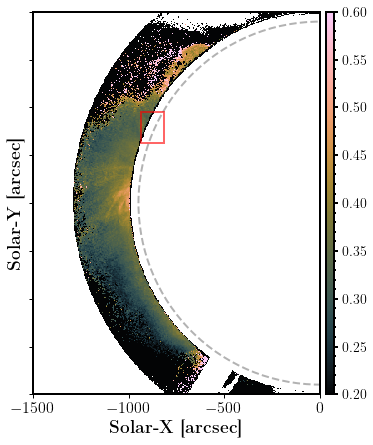

In [16]:
plot_line_ratio("../../src/CoMP/new_l2/20170821.comp.1074.l2/20170821.174607.comp.1074.dynamics.fts.gz",
                "../../src/CoMP/new_l2/20170821.comp.1079.l2/20170821.174223.comp.1079.dynamics.fts.gz",
                 [-1500,0],[-1000,1000])